# FordGo Bike Data Exploration

## Preliminary Wrangling

This document explores a dataset that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('C:\\Shalin\\Data science\\DAND folders and certification\\projects\\Project 5 - Exploratory and Explanatory Analysis\\2017-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(bike.shape)
print(bike.dtypes)
print(bike.head(10))

(519700, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object
   duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   
5          9226  2017-

In [4]:
# Create year, month and day of week columns 
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

# extract month and day of week from Start Time to create new columns
bike['year'] =  bike['start_time'].dt.year
bike['month'] =  bike['start_time'].dt.month
bike['day_of_week'] =bike['start_time'].dt.weekday_name

In [5]:
# REmove all NaN values from the dataframe
bike.dropna(inplace=True)

In [6]:
# Convert birth year into categorical variable type
bike['member_birth_year'] = bike['member_birth_year'].astype('int64')

In [7]:
# Convert member_gender and user_type to categorical variable
bike.member_gender = bike.member_gender.astype('category')
bike.user_type = bike.user_type.astype('category')

In [8]:
# Convert day of week and month to categorical variables by assigning the days and month names instead of integer assignments that they currently have
month_map = {1:'January',2:'February',3:'March',4:'April',6:'June', 7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
bike['month'] = bike['month'].apply(lambda x: month_map[x])
bike


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,year,month,day_of_week
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,2017,December,Sunday
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,2017,December,Sunday
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,2017,December,Sunday
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,2017,December,Sunday
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,2017,December,Sunday
13,2170,2017-12-31 23:52:55.937,2018-01-01 00:29:06.924,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,3717,Subscriber,1990,Male,2017,December,Sunday
15,1544,2017-12-31 23:53:38.943,2018-01-01 00:19:23.047,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,558,Subscriber,1980,Female,2017,December,Sunday
16,1474,2017-12-31 23:54:40.146,2018-01-01 00:19:14.351,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,3646,Subscriber,1979,Male,2017,December,Sunday
18,1532,2017-12-31 23:52:49.497,2018-01-01 00:18:21.953,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3114,Subscriber,1988,Other,2017,December,Sunday
19,1216,2017-12-31 23:46:33.993,2018-01-01 00:06:50.058,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,123,Folsom St at 19th St,37.760594,-122.414817,1473,Subscriber,1971,Male,2017,December,Sunday


In [9]:
# Extract hours of start_time and end_Time and create 2 columns - start hour and end hour
bike['start_time'] = pd.to_datetime(bike['start_time'])

bike['start_hour'] =  bike['start_time'].dt.hour
bike['end_hour'] =  bike['end_time'].dt.hour

In [10]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 20 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null datetime64[ns]
end_time                   453159 non-null datetime64[ns]
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null category
member_birth_year          453159 non-null int64
member_gender              453159 non-null category
year                       453159 non-null int64
month                      453159 non-null object
day_of_week          

### What is the structure of your dataset?

There are 519,700 bike trips in the dataset with 20 columns. Only following 7 features of our interest
Note: Station name, id, latitudes, longitudes are of no value for the subject of investigation to this dataset

- There are no ordered (ordinal) factor variables
- The following are numeric variables: duration_sec, start_hour, member_birth_year
- The following are nominal - non ordered variables :  month, day_of_week, member_gender, user_type

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features are best for predicting the trend of trip duration 
- When are most trips taken in terms of time of day, day of the week, or month of the year?
- Does the above depend on if a user is a subscriber or customer?

Optional interest
- Does the above depend on user's gender?
- Impact of birth year on the # of trips 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- I expect that 'start_hour' (time of the day_ could have a strong impact on the duration of trip Ex: Peak working hours would have larger impact on duration of trip since people could be commuting to work OR going back from work towards home
- Birth year could also have an impact on the duration of bike trip since a younger guy could be fitter and ride longer
- 'day_of_week' could also have the strongest effect on duration. Some peak days of week should have larger impact on the duration of trip. 
- Also certain 'months' of the year, maybe summer time could have larger impact on the duration of trip. i.e. directly proportional to the journey time. 
- I would also be interested in finding the co-relation of member_gender and user_type on the duration of trip, which could possibly have not as large an impact on the duration of trip

In [11]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 20 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null datetime64[ns]
end_time                   453159 non-null datetime64[ns]
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null category
member_birth_year          453159 non-null int64
member_gender              453159 non-null category
year                       453159 non-null int64
month                      453159 non-null object
day_of_week          

## Univariate Exploration

### Quantitative (Numeric) variable
- Starting with the main feature of interest - duration of trip 

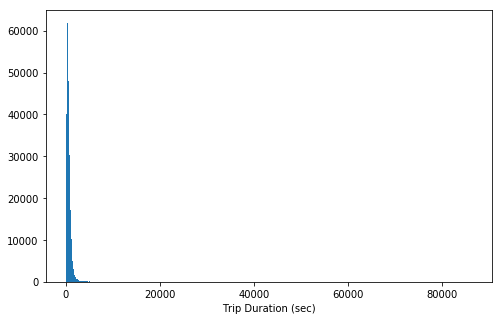

In [12]:
# start with a standard-scaled plot
binsize = 100
bins = np.arange(61, bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.xlabel('Trip Duration (sec)')
plt.show()

In [13]:
bike['duration_sec'].describe()

count    453159.000000
mean        832.934014
std        2525.280717
min          61.000000
25%         364.000000
50%         556.000000
75%         838.000000
max       86252.000000
Name: duration_sec, dtype: float64

In [14]:
np.log10(bike['duration_sec'].describe())

count    5.656251
mean     2.920611
std      3.402310
min      1.785330
25%      2.561101
50%      2.745075
75%      2.923244
max      4.935769
Name: duration_sec, dtype: float64

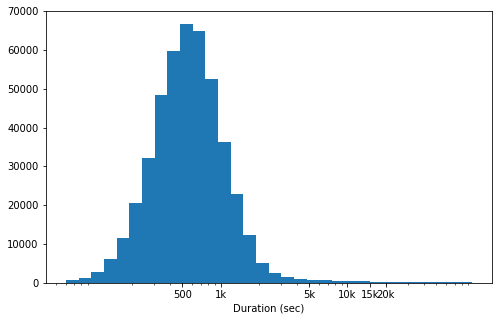

In [15]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(1.78, np.log10(bike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 5e3, 1e4, 1.5e4, 2e4], [500, '1k', '5k', '10k', '15k', '20k'])
plt.xlabel('Duration (sec)')
plt.show()

Duration has a long-tailed distribution, with a lot of trips on the low duration end, and few on the high price end. When plotted on a log-scale, the price distribution looks unimodal and right skewed distributed similar to the one in the regular scale, however log scale gives a better spread of data across the chart, with the peak being around 500 and 750. 

This indicates that normally, an average trip takes around 500-750 seconds

### Quantitative (Numeric) variable
- Next up, the first predictor variable of interest: common hour

In [16]:
common_hour = bike['start_hour'].mode()[0]
bike['start_hour'].describe()

count    453159.000000
mean         13.387416
std           4.673297
min           0.000000
25%           9.000000
50%          14.000000
75%          17.000000
max          23.000000
Name: start_hour, dtype: float64

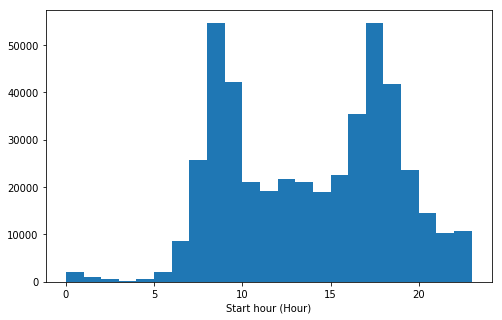

In [17]:
# start with a standard-scaled plot
binsize = 1
bins = np.arange(0, bike['start_hour'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'start_hour', bins = bins)
plt.xlabel('Start hour (Hour)')
plt.show()

Start hour has bimodal distribution, with a lot of trips during start of working hours (1 peak at 9 AM) and similarly in the evening after working hours (2nd peak at around 4:30-5 PM). Standard scale gives a good spread and equal distribution of data across  X axis, so need of log scaling

### Quantitative (Numeric) variable
- Next up, the first predictor variable of interest: birth year

In [18]:
bike['member_birth_year'].describe()

count    453159.000000
mean       1980.404787
std          10.513488
min        1886.000000
25%        1974.000000
50%        1983.000000
75%        1988.000000
max        1999.000000
Name: member_birth_year, dtype: float64

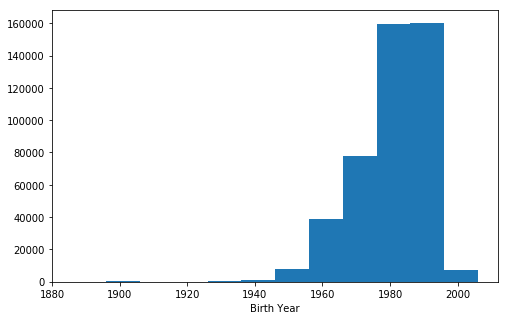

In [19]:
# start with a standard-scaled plot
binsize = 10
bins = np.arange(1886, bike['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'member_birth_year', bins = bins)
plt.xlabel('Birth Year')
plt.show()

Graph is left skewed with Millenials (1980 and younger) making mostly trips of larger duration however, there is a little  concentration of people born after 1945-1950 using bike rentals as a convenient option as well maybe to keem themselves fit however quite significantly less compared to Millenials. Post 1995 born users are also not very bike savvy where you see a sudden dip after observing a peek for 1980-1995 born users

### Quanlitative (Categorical) variable
- Next up, the predictor variables of interest: day_of_week, month, member_gender and user_type are all categorical variables (nominal types). Due to that reason, we will plot countplot after ordering them by value_counts

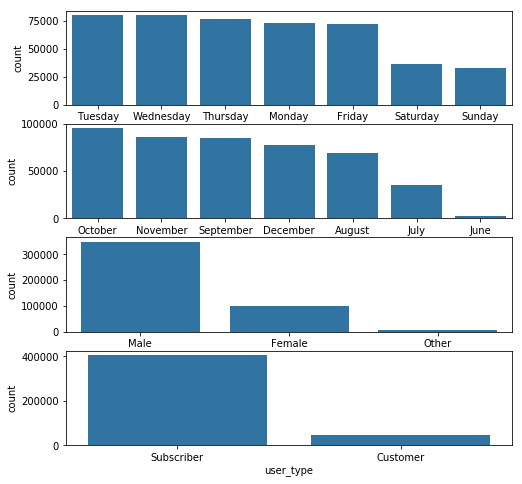

In [20]:
# let's plot all 4 categorical variables together to get an idea of each nominal variable's distribution.

fig, ax = plt.subplots(nrows=4, figsize = [8,8])

day_order = bike['day_of_week'].value_counts().index
month_order = bike['month'].value_counts().index
gender_order = bike['member_gender'].value_counts().index
user_type_order = bike['user_type'].value_counts().index

default_color = sb.color_palette()[0]
sb.countplot(data = bike, x = 'day_of_week', color = default_color, order = day_order, ax = ax[0])
sb.countplot(data = bike, x = 'month', color = default_color, order = month_order, ax = ax[1])
sb.countplot(data = bike, x = 'member_gender', color = default_color, order = gender_order, ax = ax[2])
sb.countplot(data = bike, x = 'user_type', color = default_color, order = user_type_order, ax = ax[3])


plt.show()

- The max number of distinct trips were made during Tuesday whereas the least trips were made on Sunday which indicates that many people use the bike during the their working days - mostly during Tuesday, followed closely by WednesdaY
- The max number of distinct trips were made during October month and least during June month which shows summer time is not the most popular maybe because SF is still pleasant for bike riding during OCtober, whereas it gets really hot during June 
- Subscribers make more number of trips (significantly larger) than the Customers (who casually reserve bikes)
- Male users are significantly more than the female users

### Finding outliers to determine a better co-relation between variables

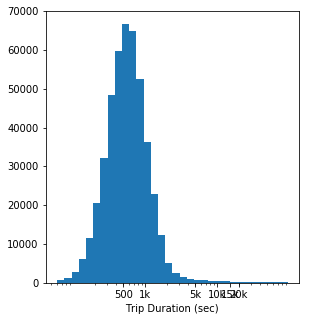

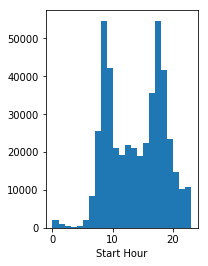

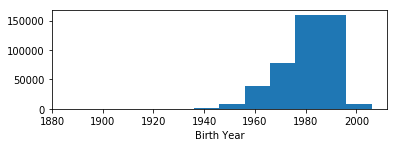

In [21]:
# let's start with the major numeric scales to find any outliers

plt.figure(figsize = [10, 5]) # larger figure size for subplots

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
log_binsize = 0.1
bins = 10 ** np.arange(1.78, np.log10(bike['duration_sec'].max())+log_binsize, log_binsize)
plt.xscale('log')
plt.xticks([500, 1e3, 5e3, 1e4, 1.5e4, 2e4], [500, '1k', '5k', '10k', '15k', '20k'])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.xlabel('Trip Duration (sec)')
plt.show()

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(min(bike['start_hour']), max(bike['start_hour'])+1, 1)
plt.hist(data = bike, x = 'start_hour', bins = bins)
plt.xlabel('Start Hour')
plt.show()

plt.subplot(2, 1, 1) # 2 row, 1 cols, subplot 1
bins = np.arange(min(bike['member_birth_year']), max(bike['member_birth_year'])+10, 10)
plt.hist(data = bike, x = 'member_birth_year', bins = bins)
plt.xlabel('Birth Year')
plt.show()

In [22]:
# select low outliers, using criteria eyeballed from the plots

low_outliers = ((bike['duration_sec'] < 350) | (bike['start_hour'] < 5) | (bike['member_birth_year'] < 1955))

print(low_outliers.sum())
print(bike.loc[low_outliers,:])

113224
        duration_sec              start_time                end_time  \
35               152 2017-12-31 23:41:32.917 2017-12-31 23:44:05.047   
36               249 2017-12-31 23:38:37.736 2017-12-31 23:42:47.211   
39               243 2017-12-31 23:34:46.302 2017-12-31 23:38:49.303   
60               196 2017-12-31 23:05:57.725 2017-12-31 23:09:13.951   
62               323 2017-12-31 23:00:50.666 2017-12-31 23:06:14.426   
77               338 2017-12-31 22:38:34.940 2017-12-31 22:44:13.252   
82               677 2017-12-31 22:25:49.132 2017-12-31 22:37:06.200   
91               212 2017-12-31 22:23:32.890 2017-12-31 22:27:05.858   
99               224 2017-12-31 22:16:57.797 2017-12-31 22:20:42.357   
100              205 2017-12-31 22:16:59.393 2017-12-31 22:20:25.262   
122              331 2017-12-31 21:46:52.372 2017-12-31 21:52:23.581   
152              156 2017-12-31 21:03:27.522 2017-12-31 21:06:04.056   
159              188 2017-12-31 20:48:41.090 2017-12-31 2

In [23]:
# select high outliers, using criteria eyeballed from the plots

high_outliers = ((bike['duration_sec'] > 2000) | (bike['start_hour'] > 23.5) | (bike['member_birth_year'] > 1998))
print(high_outliers.sum())
print(bike.loc[high_outliers,:])

13743
        duration_sec              start_time                end_time  \
0              80110 2017-12-31 16:57:39.654 2018-01-01 15:12:50.245   
1              78800 2017-12-31 15:56:34.842 2018-01-01 13:49:55.617   
4              43603 2017-12-31 14:23:14.001 2018-01-01 02:29:57.571   
6               4507 2017-12-31 23:49:28.422 2018-01-01 01:04:35.619   
12              2183 2017-12-31 23:52:55.581 2018-01-01 00:29:18.743   
13              2170 2017-12-31 23:52:55.937 2018-01-01 00:29:06.924   
76              2646 2017-12-31 22:02:13.306 2017-12-31 22:46:19.330   
78              3961 2017-12-31 21:35:33.018 2017-12-31 22:41:34.168   
104             2467 2017-12-31 21:29:21.340 2017-12-31 22:10:28.752   
105             2495 2017-12-31 21:28:51.194 2017-12-31 22:10:26.869   
138             2401 2017-12-31 20:45:59.815 2017-12-31 21:26:00.881   
139             2408 2017-12-31 20:45:52.649 2017-12-31 21:26:00.669   
248             2368 2017-12-31 18:25:15.889 2017-12-31 19

### Removing outliers that don't contribute to investigation of data

In [24]:
bike = bike.loc[-high_outliers & -low_outliers,:]

### Re-plotting after removing outliers

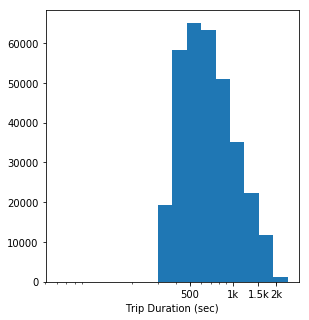

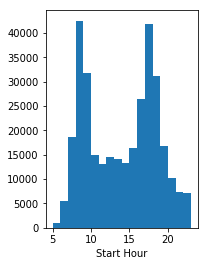

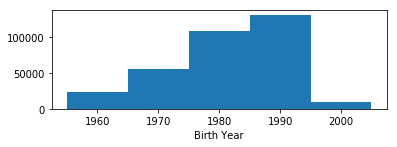

In [25]:
# Now replot the 3 charts after the outliers are removed

plt.figure(figsize = [10, 5]) # larger figure size for subplots

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
log_binsize = 0.1
bins = 10 ** np.arange(1.78, np.log10(bike['duration_sec'].max())+log_binsize, log_binsize)
plt.xscale('log')
plt.xticks([500, 1e3, 1.5e3, 2e3], [500, '1k', '1.5k', '2k'])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.xlabel('Trip Duration (sec)')
plt.show()

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(min(bike['start_hour']), max(bike['start_hour'])+1, 1)
plt.hist(data = bike, x = 'start_hour', bins = bins)
plt.xlabel('Start Hour')
plt.show()

plt.subplot(2, 1, 1) # 2 row, 1 cols, subplot 1
bins = np.arange(min(bike['member_birth_year']), max(bike['member_birth_year'])+10, 10)
plt.hist(data = bike, x = 'member_birth_year', bins = bins)
plt.xlabel('Birth Year')
plt.show()

- Start hour is bimodal and the distribution is slightly skewed and looks a little narrower than normal distribution
- Bith year is unimoda, however left skewed

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable took on a large range of values, so I looked at the data using a log transform. Under the transformation,  the price distribution looks unimodal and right skewed distributed similar to the one in the regular scale, however log scale gives a better spread of data across the chart, with the peak being around 500 and 750 seconds i.e. trips of these duration were maximum to be found

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were many outliers in case of
- Duration - with very few bike trips with duration more than 2000 seconds
- birth year - with very few bikers with age less than 1955 
Hence, outliers were removed to provide a better non skewed representation of charts to find a better co-relation between variables that will be covered in the subsequent sections

## Bivariate Exploration
To start off with, I want to look at the pairwise correlations present between features in the data.

In [26]:
numeric_vars = ['duration_sec', 'start_hour', 'member_birth_year']
categoric_vars = ['day_of_week','month','member_gender', 'user_type']

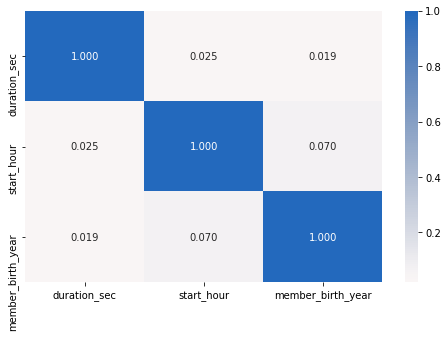

In [27]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Let's move on to looking at how duration, birth year and start hour correlate with one another (Quantitative (numeric) vs Quantitative (numeric) variables)

C:\Users\gosal\Anaconda3_2\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\gosal\Anaconda3_2\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gosal\Anaconda3_2\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


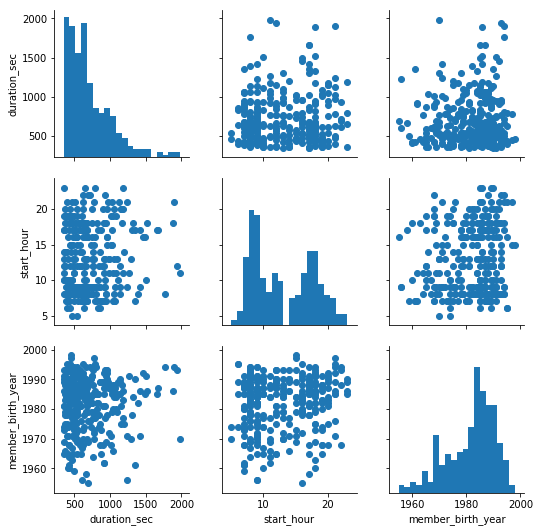

In [28]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
samples = np.random.choice(bike.shape[0], 500, replace = False)
bike_samp = bike.loc[samples,:]

g = sb.PairGrid(data = bike_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

- There is a weak positive correlation between duration and birth year i.e. Younger the user of bike (higher birth year), higher the usage of bikes and also higher duration of trips (though not a strong correlation)

*Note*: This will be expanded in this 'Bivariate variable plotting' section towards the end by drawing a scatter plot and doing any transformation as needed
- Interestingly, there is no correlation coefficient between duration and start hour

However not as useful to conclude on the correlation, this analysis is useful to determine what start hours and what birth years had the highest concentration of trips (by their duration (seconds)

### Let's move on to looking at how duration, birth year and start hour correlate with the categorical variables (Quantitative (numeric) vs Qualitative (Categorical) variable)

C:\Users\gosal\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\gosal\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\gosal\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

<Figure size 720x720 with 0 Axes>

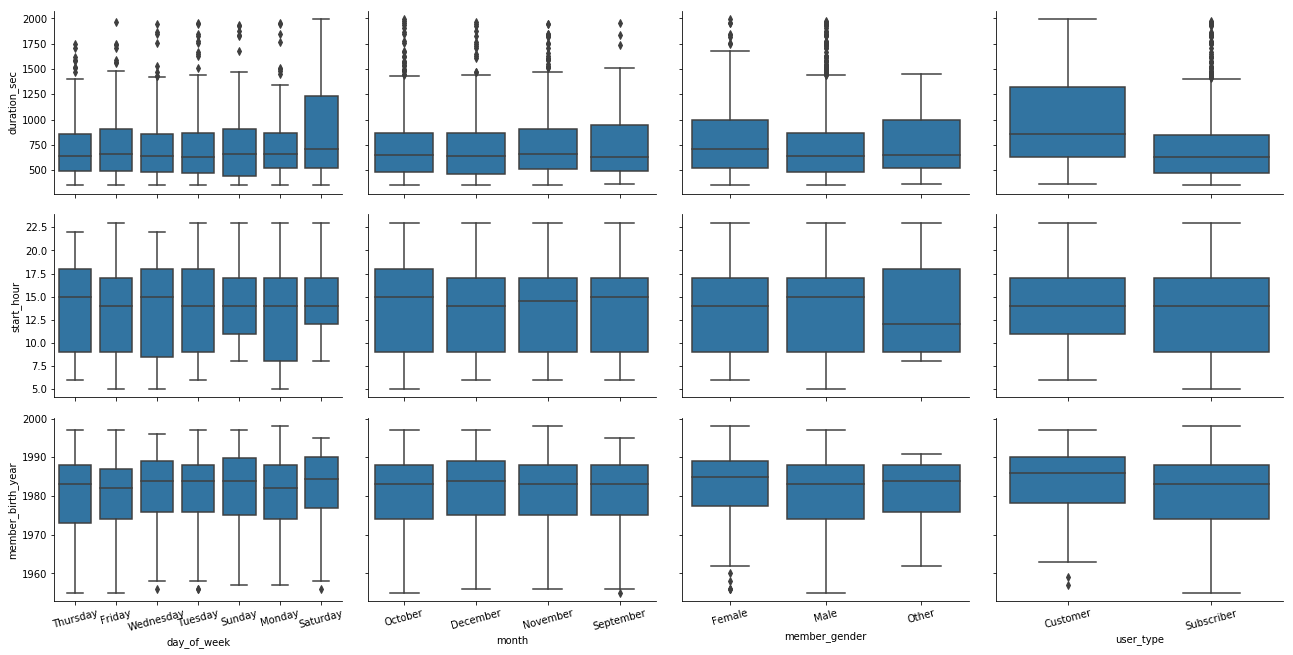

In [29]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(bike.shape[0], 2000, replace = False)
bike_samp = bike.loc[samples,:]

user_type_segments = ['Customer', 'Subscriber']
userTypeclasses = pd.api.types.CategoricalDtype(ordered = True, categories = user_type_segments)
bike['user_type'] = bike['user_type'].astype(userTypeclasses); 

gender_segments = ['Male','Female','Other']
genderclasses = pd.api.types.CategoricalDtype(ordered = True, categories = gender_segments)
bike['member_gender'] = bike['member_gender'].astype(genderclasses); 

day_of_week_segments = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dayOfWeekclasses = pd.api.types.CategoricalDtype(ordered = False, categories = day_of_week_segments)
bike['day_of_week'] = bike['day_of_week'].astype(dayOfWeekclasses); 

month_segments = ['January','February','March', 'April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthclasses = pd.api.types.CategoricalDtype(ordered = False, categories = month_segments)
bike['month'] = bike['month'].astype(monthclasses); 


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 15);

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = bike_samp, y_vars = ['duration_sec','start_hour', 'member_birth_year'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

- Since the categorical variables are nominal data types, there is no value determining if there is a positive OR negative correlation between categorical variables and numerical variables as far as there is a correlation

What matters most is what 
- What day of week has the highest bike trip duration . From the results, it shows the median trip duration is maximum during SAturday, attributing to weekend time AND not necessarily to working hours of weekdays
- What month has the highest bike trip duration. From the results, it shows that the median trip duration is maximum during September, however there is not much difference across months which indicates a week co-relation
- Does the user being a subscriber OR Customer affect trip duration? Maybe, because Customers travel for larger duration based on the median value as determined from above box plot

### Let's move on to looking at how the 4 categorical variables relate to each other : (Quanlitative (categorical) vs Qualitative (Categorical) variable)


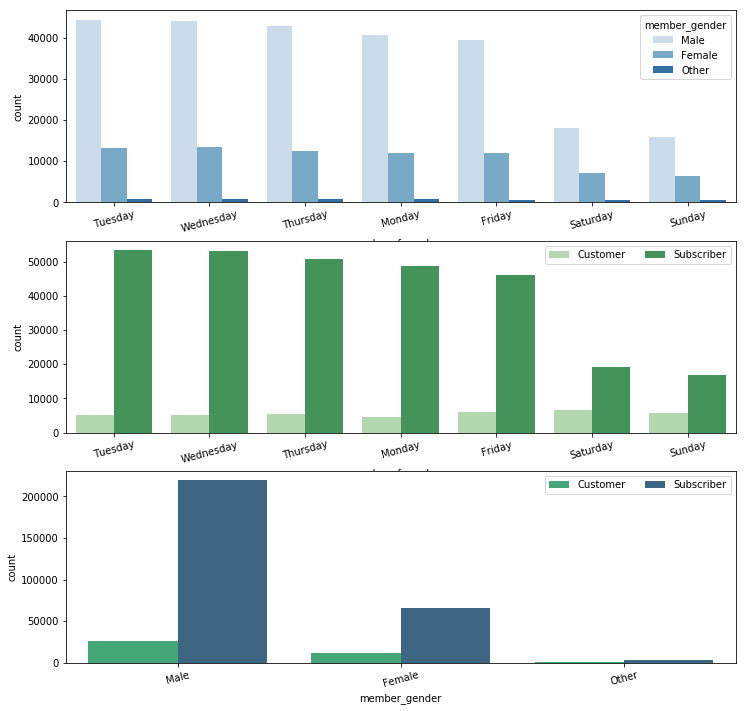

In [30]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [12, 12])


day_order = bike['day_of_week'].value_counts().index
month_order = bike['month'].value_counts().index
gender_order = bike['member_gender'].value_counts().index
user_type_order = bike['user_type'].value_counts().index

# subplot 1: day_of_Week vs month
plt.subplot(3, 1, 1)
sb.countplot(data = bike, x = 'day_of_week', hue = 'member_gender', order = day_order, palette = 'Blues')
plt.xticks(rotation = 15)

# subplot 2: day_of_week vs. member_gender
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike, x = 'day_of_week', hue = 'user_type', order = day_order, palette = 'Greens')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)

# subplot 3: day_of_Week vs. user_type, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bike, x = 'member_gender', hue = 'user_type', order = gender_order, palette = 'viridis_r')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)

plt.show()

This doesn't contribute much for the purpose of investigation of data, however, it just gives a spread of data by these variables. However, our interest is to see the co-relation of these variables on duration of trip

Now plot individual categorical variables against duration_sec to find the co-relation

### Bivariate plot - Quantitative (numerical) : duration_sec vs. Qualitiative (Categorical): day_of_week

C:\Users\gosal\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


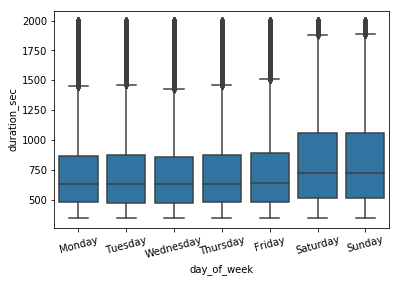

In [31]:
day_of_week_segments = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dayOfWeekclasses = pd.api.types.CategoricalDtype(ordered = False, categories = day_of_week_segments)
bike['day_of_week'] = bike['day_of_week'].astype(dayOfWeekclasses); 

base_color = sb.color_palette()[0]
sb.boxplot(data = bike, x = 'day_of_week', y  = 'duration_sec', color = base_color);
plt.xticks(rotation = 15);

### Bivariate plot - Quantitative (numerical) : duration_sec vs. Qualitiative (Categorical): month

C:\Users\gosal\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


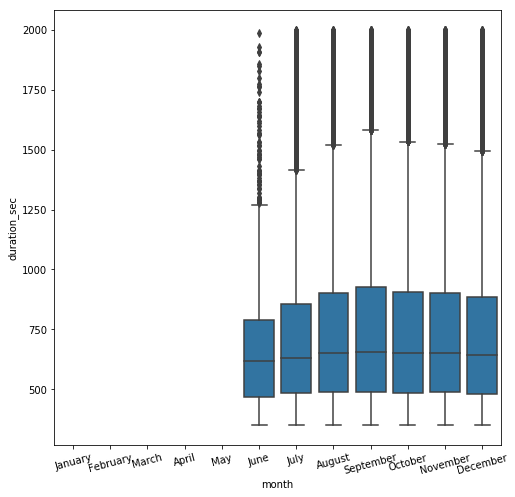

In [32]:
plt.figure(figsize = [8, 8])

month_segments = ['January','February','March', 'April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthclasses = pd.api.types.CategoricalDtype(ordered = False, categories = month_segments)
bike['month'] = bike['month'].astype(monthclasses); 

base_color = sb.color_palette()[0]
sb.boxplot(data = bike, x = 'month', y  = 'duration_sec', color = base_color);
plt.xticks(rotation = 15);

### Bivariate plot - Quantitative (numerical) : duration_sec vs. Qualitiative (Categorical): gender

C:\Users\gosal\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


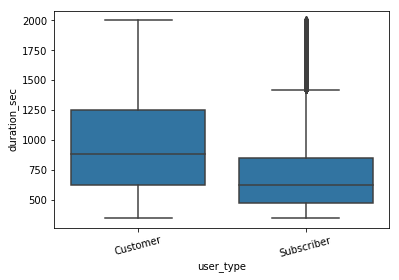

In [33]:
user_type_segments = ['Customer','Subscriber']
userTypeclasses = pd.api.types.CategoricalDtype(ordered = True, categories = user_type_segments)
bike['user_type'] = bike['user_type'].astype(userTypeclasses); 

base_color = sb.color_palette()[0]
sb.boxplot(data = bike, x = 'user_type', y  = 'duration_sec', color = base_color);
plt.xticks(rotation = 15);

With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. First, I want to see how duration and birth year are related to one another for all of the data, and to plot duration on a log scale.

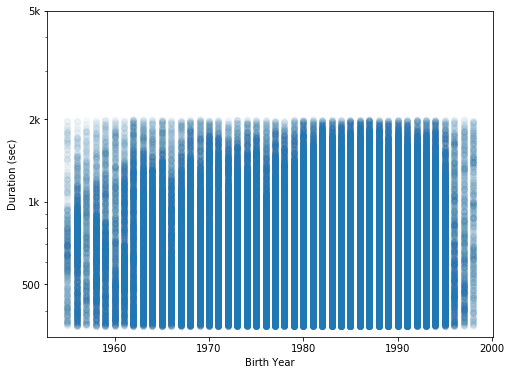

In [34]:
# scatter plot of duration_sec vs. member_birth_year, with no transform on y (duration_sec) axis

plt.figure(figsize = [8, 6])
plt.scatter(data = bike, x = 'member_birth_year', y = 'duration_sec', alpha = 1/50)
#plt.xlim([1880, 1997])
plt.xlabel('Birth Year')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3], [500, '1k', '2k', '5k'])
plt.ylabel('Duration (sec)')
plt.show()

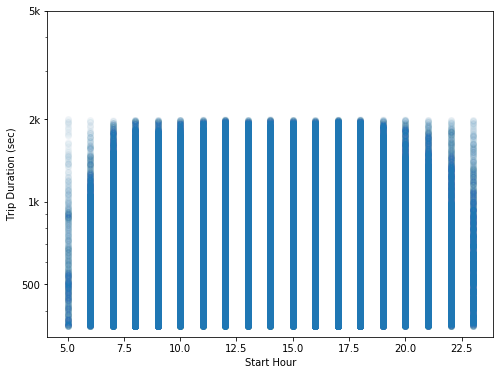

In [35]:
# scatter plot of duration_sec vs. start_hour, with no transform on y (duration_sec) axis

plt.figure(figsize = [8, 6])
plt.scatter(data = bike, x = 'start_hour', y = 'duration_sec', alpha = 1/50)
#plt.xlim([1880, 1997])
plt.xlabel('Start Hour')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3], [500, '1k', '2k', '5k'])
plt.ylabel('Trip Duration (sec)')
plt.show()

The plot shows there is no linear correlation between the numeric variables. It will be interesting to see how the categories map in the multivariate analysis.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Duration had a surprisingly no correlation with the birth year OR start hour before AND after transforming the features. The scatterplot that came out of this also suggested that there is an equal distribution across a) all ages b) start hours when it comes to the average duration of trip AND # of trips 

There was also an interesting relationship observed between duration (Sec) and the categorical features. For all : month, day of week and user type, since they are not ordinal variables, we don't necessarily expect a direct proporitionate relationship between a day, month OR a certain user type with the duration of trip, however w.r.t nominal variable context, it was found that

1) Saturday was the day where the users spent most average duration (Sec) on the bike

2) September was most popular when it came to average duration (Sec) spent on bike, but it is not a clear winner, since all the other months follow it closely..There is a weak normal distribution like trend found between June to DEcember (in the increasing order of months). In no case, it forms a linear distribution trend

3) Customers spend on an average a lot more time on the bikes compared to a subscriber maybe because they want to try out the product more and considering they could be non members OR first time users, it is a novelty factor that could bind them more to using the bike for a larger duration

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- All categorical variables were plotted against the other 2 numeric variables, namely - start_hour and member_birth_year, however those are not useful for the context of this investigation
- Noteably, 1 categorical variable: gender was plotted against numerical variables. It was observed that 'Other' (undefined genders) used the bike for longer duration however, my scope of this investigation doesn't account for 'Gender' as an important variable to find any co-relation with the data findings

## Multivariate Exploration
The main thing I want to explore in this part of the analysis is how the three categorical measures - day_of_week, month, user_type  play into the relationship between duration_sec and member_birth_year
Note: It was determined as a part of univariate and bivariate analysis that there is no linear correlation between between numeric variables, however, we will try to find that using Mulivariate analysis

###  Find correlation between duration, birth year and categorical measures - day of week, month and user type (2 Quantitative variables vs 1 qualitiative variable)

In [36]:
bike['duration_sec'].describe()

count    326963.000000
mean        740.411181
std         334.255325
min         350.000000
25%         486.000000
50%         648.000000
75%         900.000000
max        2000.000000
Name: duration_sec, dtype: float64

In [37]:
bike['member_birth_year'].describe()

count    326963.000000
mean       1980.928068
std           9.427188
min        1955.000000
25%        1975.000000
50%        1983.000000
75%        1988.000000
max        1998.000000
Name: member_birth_year, dtype: float64

####  Find correlation between duration, birth year and day of week - Use regplot plot w/ Facetgrid chat
Note: Can also use histogram instead of regplot. Just for variety, that will be used for 2nd categorical variable - month (Next chart)

C:\Users\gosal\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


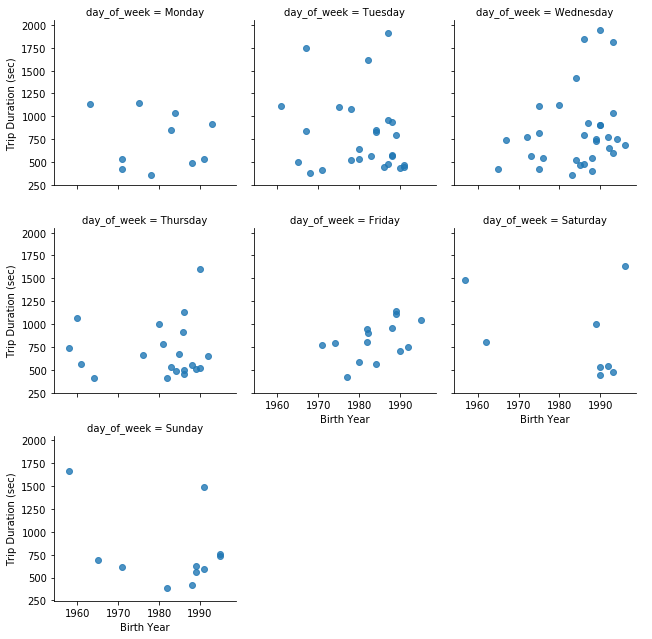

In [38]:
# Use a sample to prevent overplotting
np.random.seed(2018)
sample = np.random.choice(bike.shape[0], 200, replace = False) 
bike_subset = bike.loc[sample]

g = sb.FacetGrid(data = bike_subset, col = 'day_of_week', col_wrap = 3, height = 3)
g = g.map (sb.regplot, 'member_birth_year', 'duration_sec', x_jitter = 0.03, fit_reg = False);
g.add_legend()
g.set_xlabels('Birth Year')
g.set_ylabels('Trip Duration (sec)')

It was observed that for different days of week, users of different age groups used the bike differently
- On Monday and Tuesday, users born between 1960 and 1970 used the bike for longer duration (maybe owing to Fitness reasons). However there is a large number of Millenials who are using bikes too overall during weekdays. The number grows on Wednesday, Thursday and Friday and they outmatch the older aged people (More # of millenials + higher trip duration)
- On Saturday and Sunday, the bike was used more by the Millenials for a longer time, however there were users born between 1965-1970 who also matched the trend of millenials

- Overall, the mellenials seem to be using the bike more often and for a larger duration (As was observed in the Multivariate trend too)

####  Find correlation between duration, birth year and User type i.e. Subscriber OR Customer - Use hist2d plot w/ Facetgrid chat

In [39]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(1955, 1998 +10, 10)
    bins_y = np.arange(350, 2000 + 100, 100)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.xticks([1950,1960,1970,1980,1990,2000], ['1950','1960','1970','1980','1990','2000'])
    plt.yticks([500,1000,1500,2000], ['500', '1k', '1.5k', '2k'])

C:\Users\gosal\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


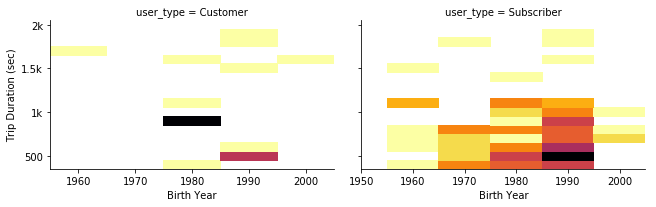

In [40]:
# Use a sample to prevent overplotting
np.random.seed(2018)
sample = np.random.choice(bike.shape[0], 200, replace = False) 
bike_subset = bike.loc[sample]

g = sb.FacetGrid(data = bike_subset, col = 'user_type', col_order =['Customer','Subscriber'],
                 col_wrap = 3, height = 3, aspect = 1.5)
g = g.map(hist2dgrid, 'member_birth_year', 'duration_sec', color = 'inferno_r')
#g.map(plt.hist, 'comb', binsbin);
g.set_xlabels('Birth Year')
g.set_ylabels('Trip Duration (sec)')

plt.show()

- As a part of bivariate plotting, it was observed that the customers spent larger average duration of trip than Subscriber. As a part of this multivariate plotting, it can be observed that the Subscriber base being more (as was also observed in Univariate plotting) has more dense chart, but w.r.t the trend of user base vs Birth year and Trip duration, it can be concluded that:

 i) Customers aged 1985-1995 spend more time on biking in terms of trip duration, followed closely by customers aged 1975-1985. Also the same trend for the number of bike users in this age group
 
 ii) Subscribers aged 1985-1995 are most bike savvy (i.e. Millenial group) , however there is not a consistent trend in terms of how long they spend time on the bike (it has varied colors and each millenial biker spends different time on bike trips). 
 
 iii) Subscribers belonging to Older generation (1955-1965) spend lesser time on biking and also the count of such users is lower - mostly spend less than 800 seconds across this subset of user base and also the count of such users is lower than Millenials (COlor is the lightest in this area)
 
 iv) Subscribers belonging to age group that is relatively younger but non as young as Millenial generation (1965-1975) spend lesser time on biking - mostly less than 800 seconds across this subset of user base and also the count of such users is lower than Millenials but little higher than Older generation (Since the color is darker)


### Find correlation between duration, birth year and User type i.e. Subscriber OR Customer, Month  - Use hist2d plot w/ Facetgrid chat (2 Quantitative variables vs 2 qualitiative variable)

C:\Users\gosal\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


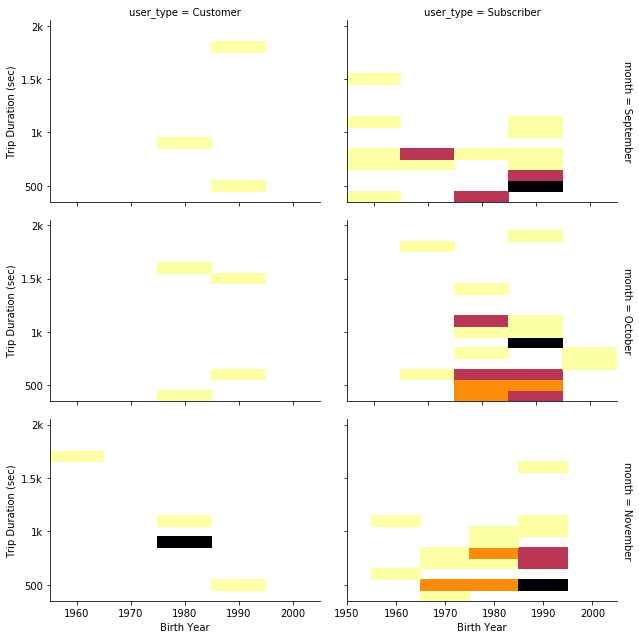

In [41]:
# create faceted heat maps on levels of month and day of week

np.random.seed(2018)
sample = np.random.choice(bike.shape[0], 200, replace = False) 
bike_subset = bike.loc[sample]

g = sb.FacetGrid(data = bike_subset, row = 'month', row_order = ['September','October','November'],
                 col = 'user_type', height = 3, aspect = 1.5, margin_titles = True)
g = g.map(hist2dgrid, 'member_birth_year', 'duration_sec', color = 'inferno_r')
g.set_xlabels('Birth Year')
g.set_ylabels('Trip Duration (sec)')

plt.show()

As can be seen, 
- September looks more spread out in terms of bike usage across all age groups, 
- However, OCtober month has compared to other months, 

i) a few users with larger trip duration though a few number

ii) a wider concentraion of users aged 1975-1995 using bikes more consistently though for a smaller duration of trip making this month more popular for users belonging a narrower range of users as compared to September, which has a spread across all age groups, however with lesser concentration (# of trips) and lesser duration (duration time)

I tried looking at a faceted heat map across two quality dimensions AND 1 quality dimension, which gave insights of user base, day of the week and how that relates to duration of biking trip
Now, conclude our major analysis by looking at 2 qualitiative variables i.e user type and day of week, user type and month and its relation to 1 quantitative variable (duration) 

### Find correlation of duration, User type i.e. Subscriber OR Customer and day of week  - Use point plot  : 2 Qualitative variables vs 1 quantiative variable)

C:\Users\gosal\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


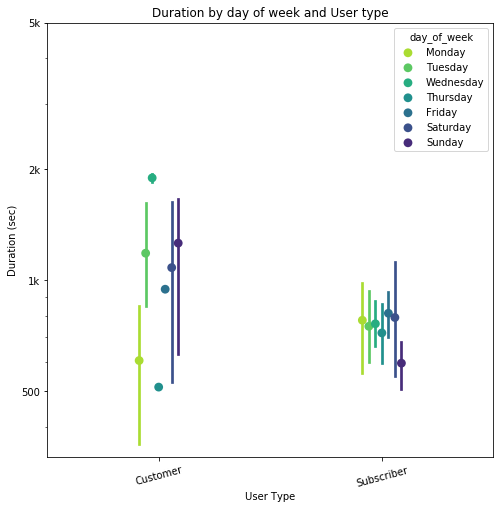

In [47]:
 # Color encoding w/ FAceted chart : Duration, birth year w/ categorical variable: day of week
 
np.random.seed(2018)
sample = np.random.choice(bike.shape[0], 200, replace = False) 
bike_subset = bike.loc[sample]

plt.figure(figsize = [8, 8])
ax = sb.pointplot(data = bike_subset, x = 'user_type', y= 'duration_sec', hue = 'day_of_week', dodge = True, linestyles = "", palette = 'viridis_r')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3], ['500', '1k', '2k', '5k'])
ax.set_yticklabels([], minor = True)
plt.xticks(rotation = 15);
plt.ylabel('Duration (sec)');
plt.xlabel('User Type');
plt.title('Duration by day of week and User type')
plt.show();


- Customers have higher peak values in terms of trip duration and even the median values across each day of week. However as was determined in Bivariate plotting, the total average trip duration for customers is lesser - maybe owing to the number of Customers being significantly less compared to Subscribers

- Saturday was most popular in terms of trip duration for Subscriber, however the popularity in terms of total time and average time both fell drastically on Sunday
- Sunday was most popular in terms of trip duration for Customers, closely followed by Sunday

To summarize, weekends were more popular and it spiked the peak time and average time, with the exception of Sunday for 'Subscriber' giving no specific co-relation as to why

### Find correlation of duration, User type i.e. Subscriber OR Customer and  month - Use point plot  : 2 Qualitative variables vs 1 quantiative variable)

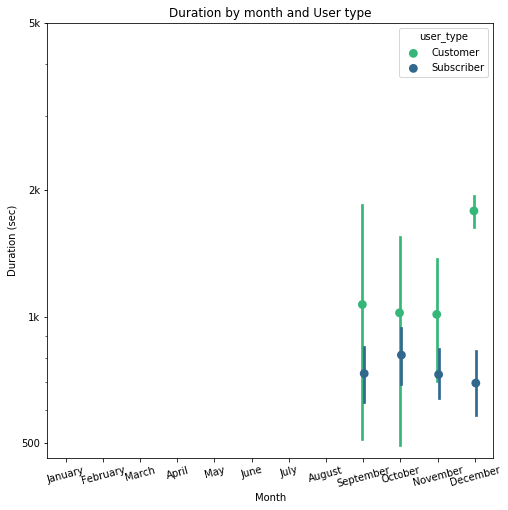

In [45]:
 # Color encoding w/ FAceted chart : Duration, birth year w/ categorical variable: day of week
 
plt.figure(figsize = [8, 8])
ax = sb.pointplot(data = bike_subset, x = 'month', y= 'duration_sec', hue = 'user_type', dodge = True, linestyles = "", palette = 'viridis_r')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3], ['500', '1k', '2k', '5k'])
ax.set_yticklabels([], minor = True)
plt.xticks(rotation = 15);
plt.ylabel('Duration (sec)');
plt.xlabel('Month');
plt.title('Duration by month and User type')
plt.show();

June, July and August have no trips mainly because 1) they were outlier data and no longer belonging to the dataset 2) A sample was randomly selected. Those 3 months can be ignored

However, for the remaining months,
- Customers, though had fewer trips travelled for longer duration compared to Subscribers
- September had the most trips and most average trip duration , followed by OCtober
- There are few outliers in the month of December where people are making trips for longer time, maybe due to festive season

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of duration against day of week, month and user type in this section by looking at the impact of the three categorical quality features (day of week, month and user type). The multivariate exploration here showed that there is no linear correlation between duration of trip and any of the categorical variables, however this plotting helped find the most popular day of week, month and also the user type using the bike 

### Were there any interesting or surprising interactions between features?

Looking back on the point plots, it doesn't seem like there's no ystematic interaction effect between the three categorical features - i.e. they are all independent. But it is interesting seeing the trend of month and days of weeks and how it relates to the popularity of biking for Customers and Subscribers 